## Import Library and Dataset

In [64]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pylab as pylab
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score




In [65]:
df= pd.read_csv('blood_pressure_prediction (3).csv')


In [66]:
df.head()

,heart_rate,body_temperature,oxygen_saturation,systolic_bp,diastolic_bp
0,92.634938,36.937121,100.000000,132.901502,97.183033
1,48.590293,36.166390,85.808770,92.715690,77.088107
2,115.028821,36.897891,89.449863,129.637104,83.614922
3,79.530937,37.500000,90.819953,130.044477,88.213206
4,55.463990,37.225860,81.925893,109.127010,74.569882


## Exploratory data analysis

In [67]:
df.duplicated().sum()


1

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   heart_rate         1000 non-null   float64
 1   body_temperature   1000 non-null   float64
 2   oxygen_saturation  1000 non-null   float64
 3   systolic_bp        1000 non-null   float64
 4   diastolic_bp       1000 non-null   float64
dtypes: float64(5)
memory usage: 39.2 KB


In [69]:
df.isnull().sum()

heart_rate           0
body_temperature     0
oxygen_saturation    0
systolic_bp          0
diastolic_bp         0
dtype: int64

In [70]:
df.describe()

,heart_rate,body_temperature,oxygen_saturation,systolic_bp,diastolic_bp
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,79.842176,36.964337,95.272186,125.259808,85.158519
std,19.180861,0.421716,6.339241,14.534694,9.809933
min,40.000000,36.000000,59.946308,90.000000,60.000000
25%,66.542222,36.658576,91.466964,115.432555,78.435703
50%,80.599156,37.003479,98.686481,124.981266,85.243901
75%,93.189843,37.358042,100.000000,135.186605,91.613573
max,120.000000,37.500000,100.000000,160.000000,110.000000


In [71]:
df.isnull().sum()

heart_rate           0
body_temperature     0
oxygen_saturation    0
systolic_bp          0
diastolic_bp         0
dtype: int64

<Axes: >

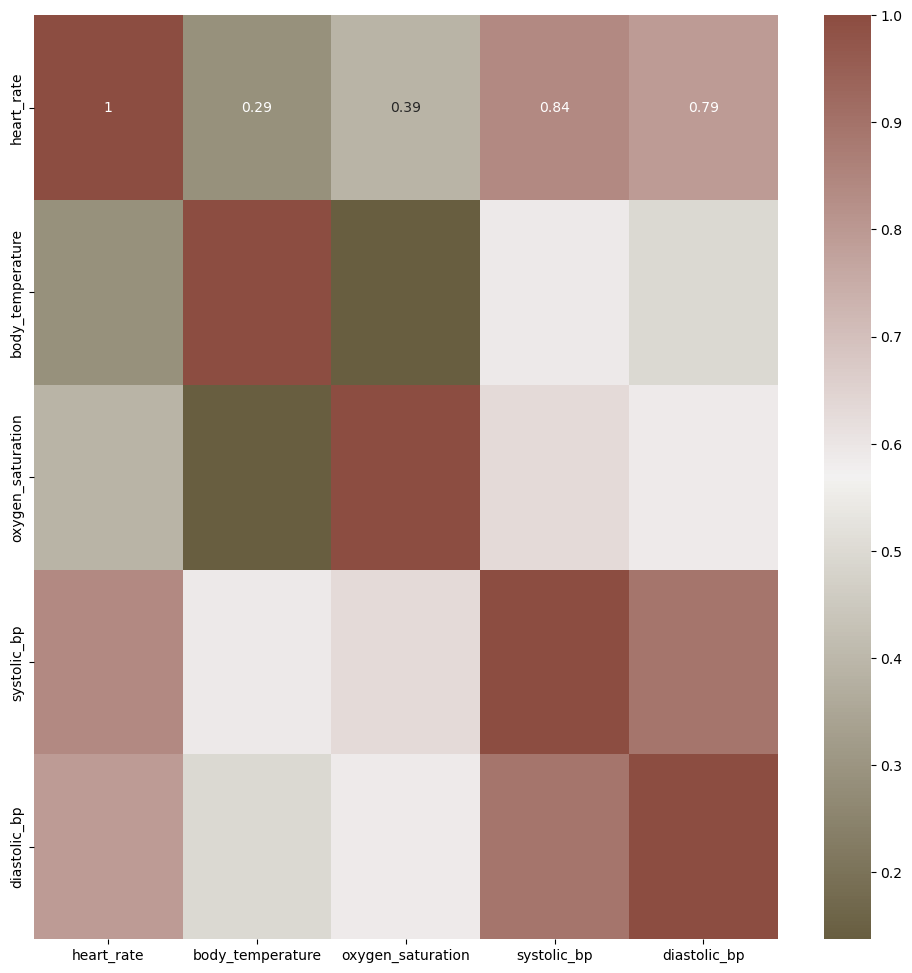

In [72]:
cmap = sns.diverging_palette(70,20,s=50, l=40, n=6,as_cmap=True)
corrmat= df.corr()
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corrmat,cmap=cmap,annot=True, )

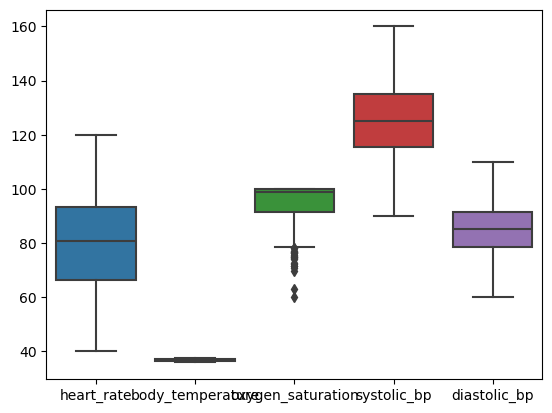

In [73]:
b=sns.boxplot(df)

## Data Preprocessing

In [74]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
daf=scaler.fit_transform(df)
datas=pd.DataFrame(daf)

<Axes: ylabel='Density'>

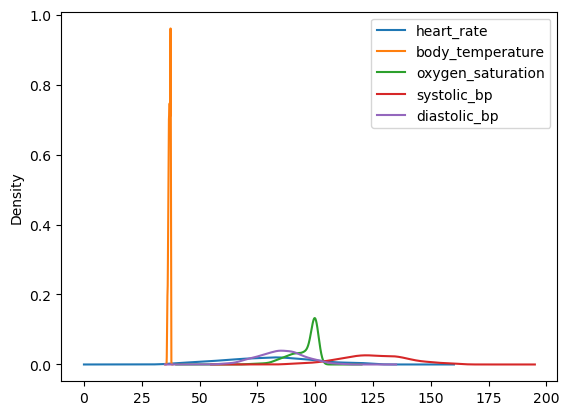

In [75]:
df.plot.kde()

<Axes: ylabel='Density'>

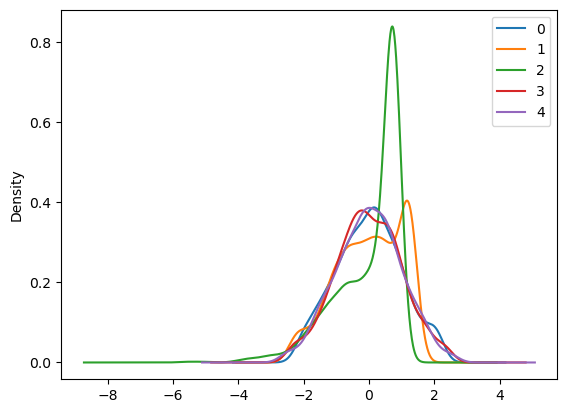

In [76]:
datas.plot.kde()

C:\Users\Hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

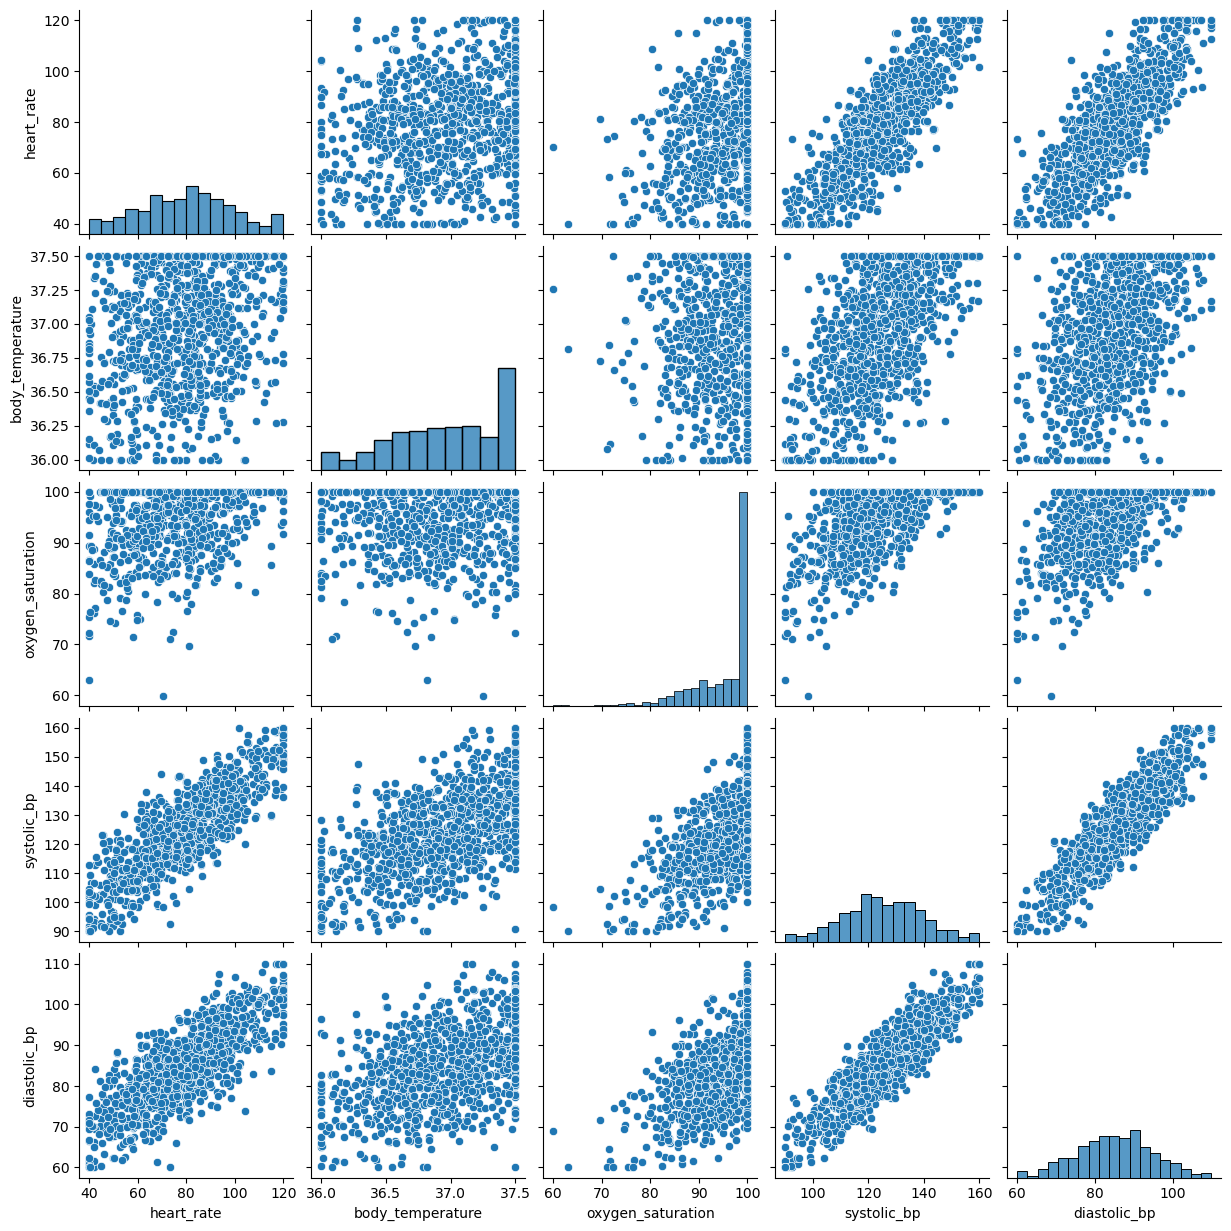

In [77]:
ax=sns.pairplot(df)


<Axes: >

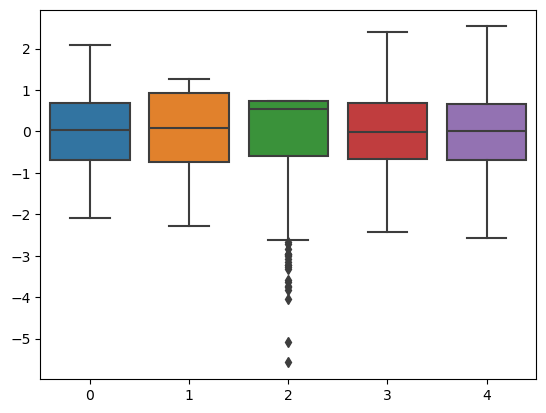

In [78]:
sns.boxplot(datas)

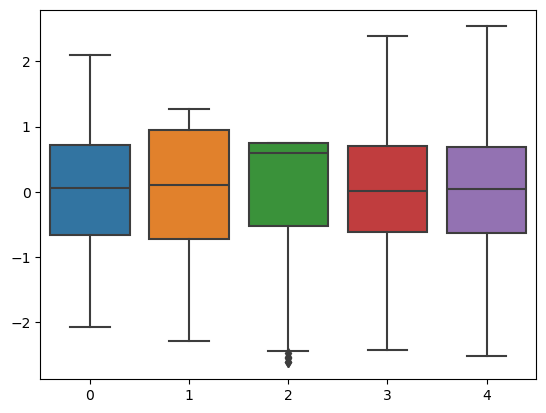

In [79]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

for col in datas.columns:
    datas = remove_outliers(datas, col)

sns.boxplot(data=datas)
plt.show()



C:\Users\Hp\AppData\Local\Temp\ipykernel_5404\2124497438.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(datas[4],bins=50,color='r',ax=ax)
C:\Users\Hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Hp\AppData\Local\Temp\ipykernel_5404\2124497438.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar fl

Text(0.5, 1.0, 'Distribution of systolic blood pressure')

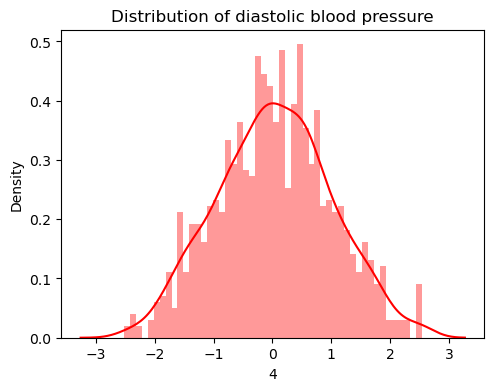

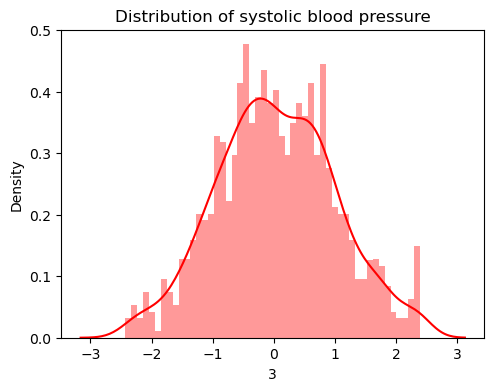

In [80]:
f= plt.figure(figsize=(12,4))

ax=f.add_subplot(121)
sns.distplot(datas[4],bins=50,color='r',ax=ax)
ax.set_title('Distribution of diastolic blood pressure')

f= plt.figure(figsize=(12,4))
ax=f.add_subplot(121)
sns.distplot(datas[3],bins=50,color='r',ax=ax)
ax.set_title('Distribution of systolic blood pressure')

## Train Test split & Model building


In [81]:
from xgboost import XGBRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

X = datas.drop(columns=[3,4],axis=1)
y = datas[[3,4]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model =MultiOutputRegressor(XGBRegressor())
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))


Mean Squared Error: 0.15668478339246605


## Model XGB evaluation


In [82]:
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

R-squared: 0.8258777329673871


In [83]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import make_scorer

r2_scorer = make_scorer(r2_score)

cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring=r2_scorer)
print("Cross-validated R^2 scores:", cv_scores)
print("Average Cross-validated R^2 score:", cv_scores.mean())

param_grid = {
    'estimator__n_estimators': [50, 100, 200],
    'estimator__max_depth': [3, 6, 9]
}
grid_search = GridSearchCV(MultiOutputRegressor(XGBRegressor()), param_grid, cv=5, scoring=r2_scorer)
grid_search.fit(X_train, y_train)
print("Best parameters found:", grid_search.best_params_)
print("Best R^2 score from GridSearchCV:", grid_search.best_score_)


Cross-validated R^2 scores: [0.79193639 0.80253898 0.82486355 0.80507983 0.79961885]
Average Cross-validated R^2 score: 0.8048075203829578
Best parameters found: {'estimator__max_depth': 3, 'estimator__n_estimators': 50}
Best R^2 score from GridSearchCV: 0.8456075230758768


In [84]:
from sklearn.ensemble import RandomForestRegressor

RandomForest_reg = RandomForestRegressor(n_estimators = 100, random_state = 0)

In [85]:
RandomForest_reg.fit(X_train, y_train)
y_pred = RandomForest_reg.predict(X_test)

## Model RanForest evaluation


In [86]:
def Reg_Models_Evaluation_Metrics (model,X_train,y_train,X_test,y_test,y_pred):
    cv_score = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)
    
    r2 = model.score(X_test, y_test)
    n = X_test.shape[0]
    p = X_test.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    R2 = model.score(X_test, y_test)
    CV_R2 = cv_score.mean()

    return R2, adjusted_r2, CV_R2, RMSE
    
    print('RMSE:', round(RMSE,4))
    print('R2:', round(R2,4))
    print('Adjusted R2:', round(adjusted_r2, 4) )
    print("Cross Validated R2: ", round(cv_score.mean(),4) )

In [87]:
ndf = [Reg_Models_Evaluation_Metrics(RandomForest_reg,X_train,y_train,X_test,y_test,y_pred)]

rf_score = pd.DataFrame(data = ndf, columns=['R2 Score','Adjusted R2 Score','Cross Validated R2 Score','RMSE'])
rf_score.insert(0, 'Model', 'Random Forest')
rf_score

,Model,R2 Score,Adjusted R2 Score,Cross Validated R2 Score,RMSE
0,Random Forest,0.83634,0.833783,0.829703,0.383831


## Model LinearRegression evaluation


In [88]:
from sklearn.preprocessing import PolynomialFeatures

quad = PolynomialFeatures (degree = 2)
x_quad = quad.fit_transform(X)

X_train,X_test,y_train,y_test = train_test_split(x_quad,y,test_size=0.23,random_state=23)

plr = LinearRegression().fit(X_train,y_train)

y_train_pred = plr.predict(X_train)
y_test_pred = plr.predict(X_test)

print(plr.score(X_test,y_test))

0.8388763406687112
